In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,9)
plt.style.use('bmh')
from datetime import timedelta
from keras.models import *
from keras.layers import *
from sklearn.preprocessing import *
import seaborn as sns

In [2]:
# Load Dataset
def preprocess(file):
    data = pd.read_csv(file)
    HUElec = pd.melt(data, id_vars=["Date"], var_name='time')
    HUElec['time'] = pd.to_timedelta(HUElec['time'].apply(lambda t: f"{t[:5]}:00")) - timedelta(minutes=30)
    HUElec['Date'] = pd.to_datetime(HUElec['Date'], format="%m/%d/%Y")
    HUElec['Datetime'] = HUElec['Date'] + HUElec['time']
    HUElec = HUElec.set_index('Datetime')
    HUElec = HUElec.drop(['Date', 'time'], axis=1).sort_index()

    return HUElec

In [128]:
file = 'C:\\Users\\moham\\OneDrive - De Montfort University\\Final Project\\Master_Thesis\\Dataset\\QBGas.csv'

data = preprocess(file)

data.fillna(method='ffill', inplace=True)

In [129]:
df = data.resample(rule='h').mean()

df.head()

,value
Datetime,
2008-02-08 00:00:00,0.0
2008-02-08 01:00:00,0.0
2008-02-08 02:00:00,0.0
2008-02-08 03:00:00,0.0
2008-02-08 04:00:00,0.0


<AxesSubplot:xlabel='Datetime'>

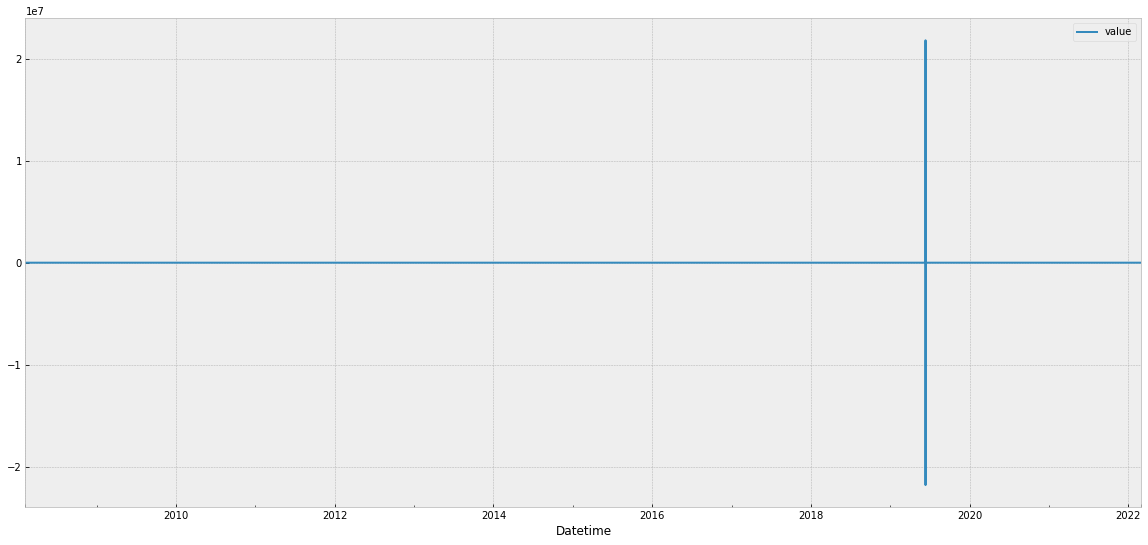

In [130]:
df.plot()

In [121]:
df['value_next_day'] = df['value'].shift(-1)

In [122]:
df = df.dropna(how='any', axis=0)
# df = df.iloc[:-1]
df.tail()

,value,value_next_day
Datetime,,
2022-02-24,0.000000,0.000000
2022-02-25,0.000000,-0.000417
2022-02-26,-0.000417,0.000000
2022-02-27,0.000000,0.000000
2022-02-28,0.000000,0.000000


In [123]:
from sklearn.metrics import *

sc = MinMaxScaler()
scaler = sc.fit_transform(df)

In [124]:
scaler

array([[0.11083822, 0.00187021],
       [0.00187021, 0.00164489],
       [0.00164489, 0.00360523],
       ...,
       [0.        , 0.00045065],
       [0.00045065, 0.00045065],
       [0.00045065, 0.00045065]])

In [125]:
scaler[:, 0]

array([0.11083822, 0.00187021, 0.00164489, ..., 0.        , 0.00045065,
       0.00045065])

In [126]:
# y_true = df['value']
# y_pred = df['value_next_day']

y_true = scaler[:, 0]
y_pred = scaler[:, 1]

In [127]:
from sklearn.metrics import *

print('RMSE: ', np.sqrt(mean_squared_error(y_true, y_pred)))
print('MSE: ', mean_squared_error(y_true, y_pred))
print('MAE: ', mean_absolute_error(y_true, y_pred))
print('R2: ', r2_score(y_true, y_pred))

RMSE:  0.13364831103167407
MSE:  0.017861871041619095
MAE:  0.07788040570105746
R2:  0.27140727591838665
